In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
import os

In [3]:
bankdf = pd.read_csv('bank-full.csv', sep = ';')
bankdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bankdf.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
bankdf.shape

(45211, 17)

In [6]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bankdf['job'] = bankdf['job'].astype({'job':'category'})
bankdf['marital'] = bankdf['marital'].astype({'marital':'category'})
bankdf['education'] = bankdf['education'].astype({'education':'category'})
bankdf['default'] = bankdf['default'].astype({'default':'category'})
bankdf['housing'] = bankdf['housing'].astype({'housing':'category'})
bankdf['loan'] = bankdf['loan'].astype({'loan':'category'})
bankdf['contact'] = bankdf['contact'].astype({'contact':'category'})
bankdf['month'] = bankdf['month'].astype({'month':'category'})
bankdf['poutcome'] = bankdf['poutcome'].astype({'poutcome':'category'})
bankdf['y'] = bankdf['y'].astype({'y':'category'})

In [8]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [9]:
bankdf.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
bankdf.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
bankdf['y'].value_counts(normalize=True)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

In [12]:
##From this data we can see that 88% customers did not subscribed for Term deposit

In [14]:
corrmat=bankdf.corr()(include=object)
corrmat

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


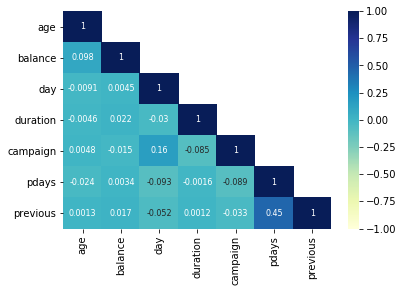

In [17]:
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(corrmat, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 8}, mask = mask)

# display the plot
plt.show()

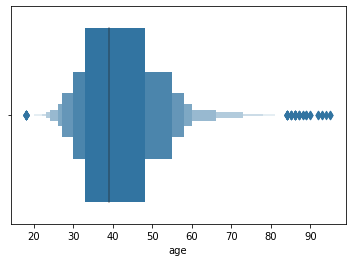

In [11]:
sns.boxenplot(bankdf['age'])

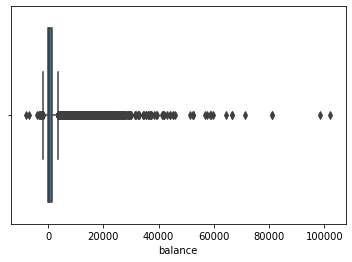

In [12]:
sns.boxplot(bankdf['balance'])

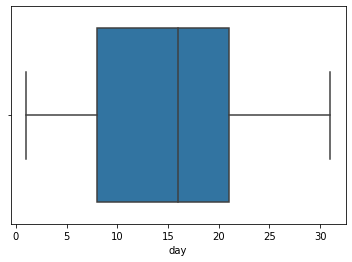

In [13]:
sns.boxplot(bankdf['day'])

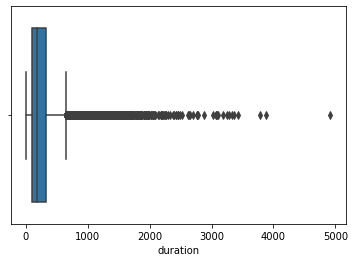

In [14]:
sns.boxplot(bankdf['duration'])

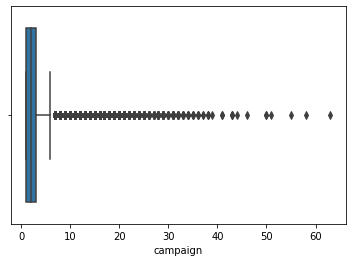

In [15]:
sns.boxplot(bankdf['campaign'])

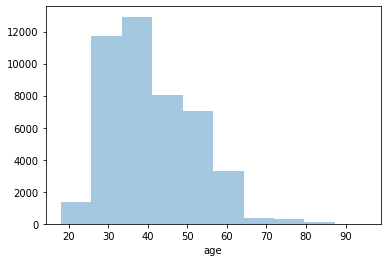

In [16]:
sns.distplot(bankdf['age'], bins=10, kde=False)

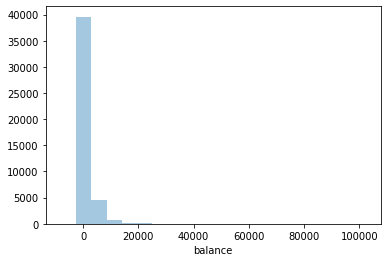

In [17]:
sns.distplot(bankdf['balance'],bins=20, kde=False)

TypeError: 'AxesSubplot' object is not iterable

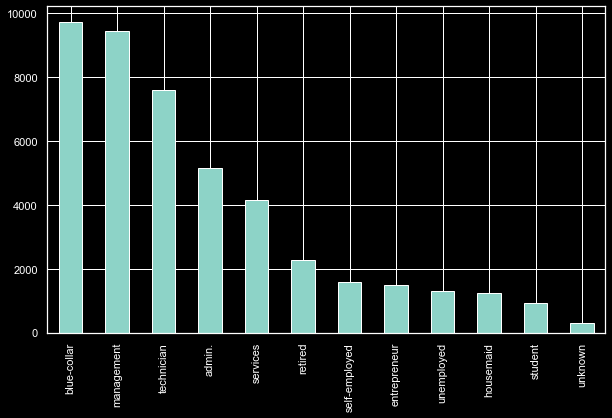

In [28]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('dark_background')

sns.countplot(bankdf['job'].value_counts().plot(kind='bar'))


plt.show()


# Assigning Numbers to categories

In [18]:
bankdf['job']= bankdf['job'].replace({'entrepreneur':1, 'management':2,'technician':3,'admin.':4,'services':5, 'self-employed':6,'blue-collar':7,'retired':8,'unemployed':9,'housemaid':10,'student':11,'unknown':12})
bankdf['education'] = bankdf['education'].replace({'primary':1,'secondary':2,'tertiary':3,'unknown':4})
bankdf['housing'] = bankdf['housing'].replace({'yes':1, 'no':0})
bankdf['default'] = bankdf['default'].replace({'yes':1, 'no':0})
bankdf['loan'] = bankdf['loan'].replace({'yes':1, 'no':0})
bankdf['y'] = bankdf['y'].replace({'yes':1, 'no':0})

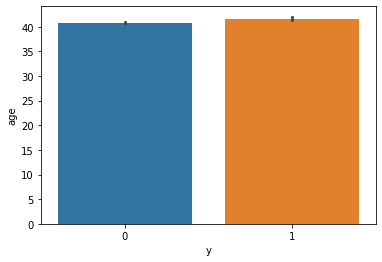

In [19]:
sns.barplot(x = 'y', y = 'age', data = bankdf)

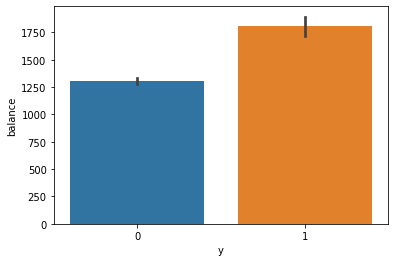

In [20]:
sns.barplot(x = 'y', y='balance', data=bankdf)

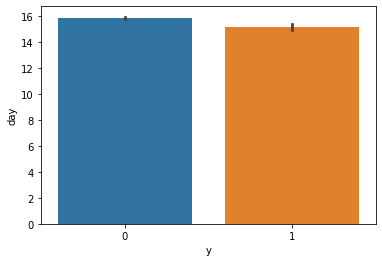

In [21]:
sns.barplot(x='y', y='day', data=bankdf)

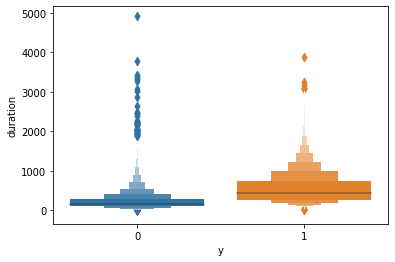

In [22]:
sns.boxenplot(x='y', y=('duration'), data=bankdf)

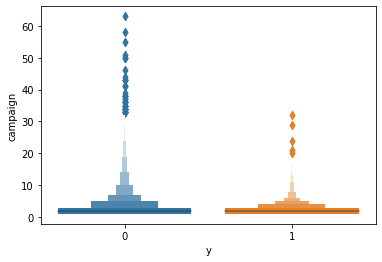

In [23]:
sns.boxenplot(x = 'y', y ='campaign', data=bankdf )

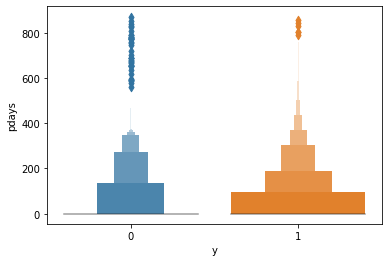

In [24]:
sns.boxenplot(x = 'y', y ='pdays', data=bankdf )

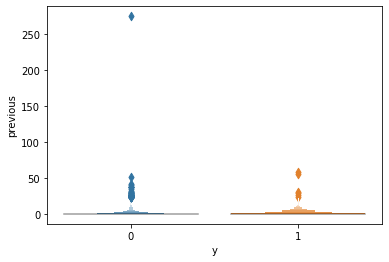

In [25]:
sns.boxenplot(x = 'y', y ='previous', data=bankdf )

Only the most relevant customer information is considered, which includes job title, education, age, balance, default record, housing record and loan record. Other information, such as ‘the number of contacts performed before this campaign’, is omitted because it is not directly related to customers themselves.

In [26]:
bankdf = bankdf.drop(columns=['marital', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'])

# Splitting dataset in Training and Test

In [27]:
X = bankdf.drop('y', axis=1)
y = bankdf['y']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state =1)

# Logestic regression

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\Vision\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
log_reg.score(X_train,y_train)

0.8816633488166334

In [31]:
log_reg.fit(X_test,y_test)

C:\Users\Vision\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
log_reg.score(X_test,y_test)

0.8856531996461221

In [33]:
log_reg = log_reg.predict(X_test)

In [34]:
print(classification_report(log_reg,y_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     13564
           1       0.00      0.00      0.00         0

    accuracy                           0.89     13564
   macro avg       0.50      0.44      0.47     13564
weighted avg       1.00      0.89      0.94     13564



C:\Users\Vision\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# K Nearest Neighbour

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
knn.score(X_train,y_train)

0.8970834518279773

In [37]:
knn.fit(X_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
knn.score(X_test,y_test)

0.8941315246240047

In [39]:
knn_pred = knn.predict(X_test)

In [40]:
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     13237
           1       0.14      0.68      0.24       327

    accuracy                           0.89     13564
   macro avg       0.57      0.79      0.59     13564
weighted avg       0.97      0.89      0.93     13564



# Decision Tree classifier

In [41]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
Dtree_score_trn= dtree_model.score(X_train, y_train)
Dtree_score_trn

0.9872025784434544

In [43]:
dtree_model.fit(X_test,y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
Dtree_score_tst = dtree_model.score(X_test,y_test)
Dtree_score_tst

0.9927012680625185

In [45]:
y_pred = dtree_model.predict(X_test)

In [46]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12106
           1       0.94      1.00      0.97      1458

    accuracy                           0.99     13564
   macro avg       0.97      1.00      0.98     13564
weighted avg       0.99      0.99      0.99     13564



# Random Forest

In [47]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
RF_score_trn = RF_model.score(X_train, y_train)
RF_score_trn

0.9871393812999653

In [49]:
RF_score_tst = RF_model.score(X_test, y_test)
RF_score_tst

0.8741521675022117

In [50]:
predictions_RF = RF_model.predict(X_test)

In [51]:
print (classification_report(y_test, predictions_RF))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     12013
           1       0.42      0.25      0.31      1551

    accuracy                           0.87     13564
   macro avg       0.66      0.60      0.62     13564
weighted avg       0.85      0.87      0.86     13564



# Ensamble

In [52]:
rfclass = RandomForestClassifier(n_estimators = 50)
rfclass.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
rfclass.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
RF_score_trn = rfclass.score(X_train, y_train)
RF_score_trn

0.8680443643947293

In [55]:
RF_score_tst = rfclass.score(X_test, y_test)
RF_score_tst

0.9914479504570923

In [56]:
rf_pred = rfclass.predict(X_test)

In [57]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12013
           1       0.99      0.94      0.96      1551

    accuracy                           0.99     13564
   macro avg       0.99      0.97      0.98     13564
weighted avg       0.99      0.99      0.99     13564



# AdaBoost Classifier

In [58]:
adb = AdaBoostClassifier(n_estimators= 50, learning_rate=1.0, random_state=22)
adb.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=22)

In [59]:
AD_score_trn = adb.score(X_train,y_train)
AD_score_trn

0.8816317502448889

In [60]:
adb.fit(X_test,y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=22)

In [61]:
AD_score_tst = adb.score(X_test,y_test)
AD_score_tst

0.8860218224712474

In [62]:
adb_pred = adb.predict(X_test)

In [63]:
print(classification_report(y_test,adb_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12013
           1       0.53      0.03      0.06      1551

    accuracy                           0.89     13564
   macro avg       0.71      0.51      0.50     13564
weighted avg       0.85      0.89      0.84     13564



# Bagging 

In [64]:
bagg_cl = BaggingClassifier(n_estimators= 50)
bagg_cl.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [65]:
Bagg_score_trn = bagg_cl.score(X_train,y_train)
Bagg_score_trn

0.9862230227193731

In [66]:
bagg_cl.fit(X_test,y_test)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [67]:
Bagg_score_tst = bagg_cl.score(X_test,y_test)
Bagg_score_tst

0.9920377469772929

In [68]:
bagg_pred = bagg_cl.predict(X_test)

In [69]:
print(classification_report(bagg_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12065
           1       0.95      0.98      0.96      1499

    accuracy                           0.99     13564
   macro avg       0.97      0.99      0.98     13564
weighted avg       0.99      0.99      0.99     13564



# Model Evaluation

In [70]:
d = {'Model': ['DTree', 'RF', 'AdaBoost', 'Bagging'], 
     'Training val':[Dtree_score_trn, RF_score_trn, AD_score_trn, Bagg_score_trn], 
     'Test Val': [Dtree_score_tst, RF_score_tst, AD_score_tst, Bagg_score_tst],}
print (d)

{'Model': ['DTree', 'RF', 'AdaBoost', 'Bagging'], 'Training val': [0.9872025784434544, 0.8680443643947293, 0.8816317502448889, 0.9862230227193731], 'Test Val': [0.9927012680625185, 0.9914479504570923, 0.8860218224712474, 0.9920377469772929]}


In [71]:
m_eval = pd.DataFrame(d)
m_eval

,Model,Training val,Test Val
0,DTree,0.987203,0.992701
1,RF,0.868044,0.991448
2,AdaBoost,0.881632,0.886022
3,Bagging,0.986223,0.992038


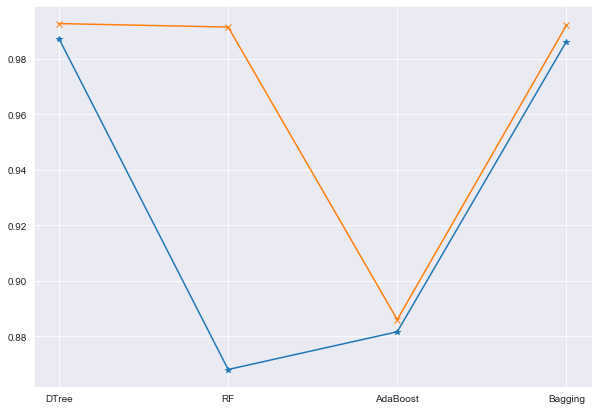

In [72]:
plt.figure(figsize = (10,7))
sns.set_style("darkgrid")
plt.plot(m_eval['Model'], m_eval['Training val'], marker = '*')
plt.plot(m_eval['Model'], m_eval['Test Val'], marker = 'x')
plt.show()